## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# importing the libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-sizing all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [3]:
# Import the resnet 50 library
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
for layer in resnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [7]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 5s 3s/step - loss: 4.7866 - accuracy: 0.3125 - val_loss: 12.9772 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 5s 2s/step - loss: 8.9967 - accuracy: 0.3281 - val_loss: 8.4339 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 5s 3s/step - loss: 3.5165 - accuracy: 0.4062 - val_loss: 3.7346 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 6s 3s/step - loss: 5.1820 - accuracy: 0.3125 - val_loss: 3.5716 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 6s 3s/step - loss: 3.6364 - accuracy: 0.3750 - val_loss: 3.6692 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 7s 4s/step - loss: 2.4859 - accuracy: 0.3906 - val_loss: 4.6132 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 7s 4s/step - loss: 3.1803 - accuracy: 0.3906 - val_

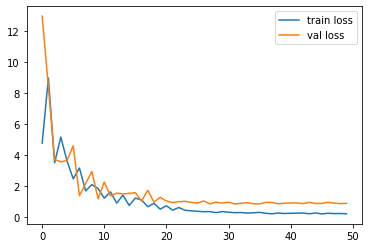

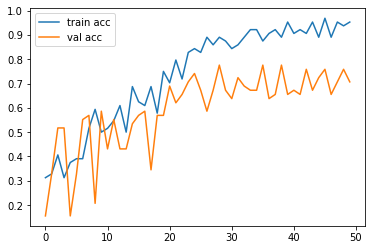

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [17]:

y_pred = model.predict(test_set)


In [18]:
y_pred

array([[6.55303418e-04, 9.90181506e-01, 9.16311983e-03],
       [2.05816343e-01, 2.32455377e-02, 7.70938098e-01],
       [1.08637303e-01, 7.43847668e-01, 1.47515044e-01],
       [5.20797908e-01, 4.48377579e-01, 3.08244880e-02],
       [4.96337116e-02, 8.98062050e-01, 5.23042195e-02],
       [5.01231998e-02, 6.13652170e-01, 3.36224616e-01],
       [4.07949127e-02, 8.18047881e-01, 1.41157269e-01],
       [4.23810780e-02, 7.27409601e-01, 2.30209321e-01],
       [2.35103264e-01, 5.77696085e-01, 1.87200665e-01],
       [1.56343520e-01, 4.45278257e-01, 3.98378193e-01],
       [1.18080832e-01, 1.59889266e-01, 7.22029865e-01],
       [2.68485583e-02, 9.71445858e-01, 1.70562265e-03],
       [9.90847498e-02, 5.09835958e-01, 3.91079277e-01],
       [5.20324968e-02, 4.86335438e-03, 9.43104208e-01],
       [5.50311320e-02, 7.95815468e-01, 1.49153441e-01],
       [2.54491806e-01, 5.80778003e-01, 1.64730161e-01],
       [4.26609993e-01, 3.64524275e-01, 2.08865747e-01],
       [1.52622968e-01, 8.25387

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [20]:
y_pred

array([1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       2, 2, 0, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1,
       0, 2, 2, 2, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0], dtype=int64)

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model=load_model('model_resnet50.h5')

In [23]:
img_data

NameError: name 'img_data' is not defined

In [24]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [25]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [26]:
x.shape

(224, 224, 3)

In [27]:
x=x/255

In [28]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [29]:
model.predict(img_data)

array([[0.01134048, 0.00667116, 0.9819884 ]], dtype=float32)

In [30]:
a=np.argmax(model.predict(img_data), axis=1)

In [32]:
a

array([2], dtype=int64)